In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
single_data_set = pd.merge( clinical_data, mouse_data, on='Mouse ID', how='left')

# Display the data table for preview

single_data_set.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [52]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume= single_data_set.groupby(["Drug","Timepoint"]).mean()
mean_tumor_volume.reset_index(level = None, inplace = True)
# Convert to DataFrame
tumor_volume = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [53]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
copy_single_data_set = single_data_set.copy()
sem_tumor= copy_single_data_set.groupby(["Drug","Timepoint"]).sem()
sem_tumor.reset_index(level = None, inplace = True)

# Convert to DataFrame
sem_tumor_df = pd.DataFrame(sem_tumor)
del sem_tumor_df['Metastatic Sites']
del sem_tumor_df['Mouse ID']
sem_tumor_df2 = pd.DataFrame(sem_tumor_df)  #assigning previous dataframe to a new datframe after deleting both columsn. 
# Preview DataFrame
sem_tumor_df2.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [54]:
# Minor Data Munging to Re-Format the Data Frames
Data_Munging =tumor_volume.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
Data_Munging.reset_index(level = None, inplace = True)
# Preview that Reformatting worked
Data_Munging

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [55]:
table_fourdrugs = Data_Munging[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


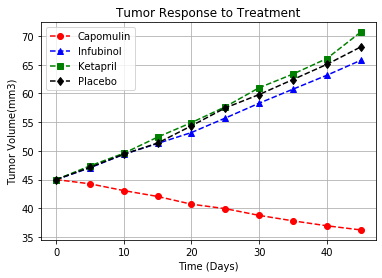

<Figure size 432x288 with 0 Axes>

In [56]:
# Generate the Plot (with Error Bars)

plt.errorbar(x=Data_Munging['Timepoint'],y=Data_Munging['Capomulin'], yerr=None, linestyle="--", fmt='o', color= 'r', label ="Capomulin")
plt.errorbar(x=Data_Munging['Timepoint'],y=Data_Munging['Infubinol'], yerr=None, linestyle="--", fmt='^', color= 'b', label ="Infubinol")
plt.errorbar(x=Data_Munging['Timepoint'],y=Data_Munging['Ketapril'], yerr=None, linestyle="--",fmt='s', color= 'g', label = "Ketapril")
plt.errorbar(x=Data_Munging['Timepoint'],y=Data_Munging['Placebo'], yerr=None, linestyle="--", fmt='d', color= 'k', label = "Placebo")

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')

plt.grid()
plt.legend()

plt.show()
# Save the Figure
plt.savefig("../TumorResponseToTreatment.png")

In [57]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_meanmet=single_data_set.copy()
Mean_Met=group_meanmet.groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
Mean_Met_df= pd.DataFrame(Mean_Met)
del Mean_Met_df['Tumor Volume (mm3)']
# Preview DataFrame
Mean_Met_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [58]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
group_se = single_data_set.copy()
standard_error = group_se.groupby(["Drug","Timepoint"]).sem()
# Convert to DataFrame
standard_error_df = pd.DataFrame(standard_error)
del standard_error_df['Tumor Volume (mm3)']
del standard_error_df['Mouse ID']
# Preview DataFrame
standard_error_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [59]:
# Minor Data Munging to Re-Format the Data Frames
# minor_data_frame = pd.DataFrame(mean_tumor_volume)

minor_Munging = tumor_volume.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
minor_Munging.reset_index(level = None, inplace = True)

# Preview that Reformatting worked
minor_Munging.head()




Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [60]:
table_minor_munging = minor_Munging[["Timepoint","Capomulin", "Infubinol", "Ketapril", "Placebo"]]

table_minor_munging.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


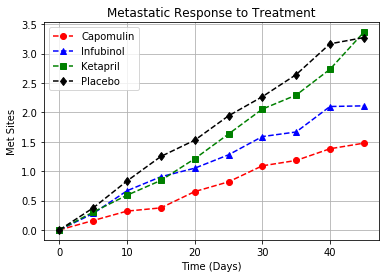

In [100]:
# Generate the Plot (with Error Bars)
label= ('')
plt.errorbar(x=table_minor_munging['Timepoint'],y=table_minor_munging['Capomulin'], yerr=None, linestyle="--", fmt='o', color= 'r', label='Capomulin')
plt.errorbar(x=table_minor_munging['Timepoint'],y=table_minor_munging['Infubinol'], yerr=None, linestyle="--", fmt='^', color= 'b', label='Infubinol')
plt.errorbar(x=table_minor_munging['Timepoint'],y=table_minor_munging['Ketapril'], yerr=None, linestyle="--",fmt='s', color= 'g',label='Ketapril' )
plt.errorbar(x=table_minor_munging['Timepoint'],y=table_minor_munging['Placebo'], yerr=None, linestyle="--", fmt='d', color= 'k', label='Placebo')


plt.ylabel("Met Sites")
plt.xlabel('Time (Days)')
plt.title('Metastatic Response to Treatment')
plt.grid()
plt.legend()      
# Save the Figure
plt.savefig("../MetSiteResponse.png")
# Show the Figure
plt.show()

In [62]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_count = single_data_set.groupby(["Drug","Timepoint"]).count()
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count["Mouse ID"])
mice_count_df.reset_index(inplace=True)

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [63]:
# Minor Data Munging to Re-Format the Data Frames
mice_reformate = mice_count_df.pivot(index="Timepoint", columns = "Drug", values = "Mouse ID")

mice_reformate.reset_index(level = None, inplace = True)

# Preview the Data Frame
mice_reformate.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [64]:
mice_reformate_four = mice_reformate[["Timepoint","Capomulin", "Infubinol", "Ketapril", "Placebo"]]

mice_reformate_four

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


In [65]:

# Generate the Plot (Accounting for percentages)
fourdrugs_df = mice_reformate_four.astype(float)
fourdrugs_df["Capomulin_percent"]=fourdrugs_df["Capomulin"]/fourdrugs_df["Capomulin"].iloc[0] * 100
fourdrugs_df["Infubinol_percent"]=fourdrugs_df["Infubinol"]/fourdrugs_df["Infubinol"].iloc[0] * 100
fourdrugs_df["Ketapril_percent"]=fourdrugs_df["Ketapril"]/fourdrugs_df["Ketapril"].iloc[0] * 100
fourdrugs_df["Placebo_percent"]=fourdrugs_df["Placebo"]/fourdrugs_df["Placebo"].iloc[0] * 100
fourdrugs_df

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Capomulin_percent,Infubinol_percent,Ketapril_percent,Placebo_percent
0,0.0,25.0,25.0,25.0,25.0,100.0,100.0,100.0,100.0
1,5.0,25.0,25.0,23.0,24.0,100.0,100.0,92.0,96.0
2,10.0,25.0,21.0,22.0,24.0,100.0,84.0,88.0,96.0
3,15.0,24.0,21.0,19.0,20.0,96.0,84.0,76.0,80.0
4,20.0,23.0,20.0,19.0,19.0,92.0,80.0,76.0,76.0
5,25.0,22.0,18.0,19.0,17.0,88.0,72.0,76.0,68.0
6,30.0,22.0,17.0,18.0,15.0,88.0,68.0,72.0,60.0
7,35.0,22.0,12.0,17.0,14.0,88.0,48.0,68.0,56.0
8,40.0,21.0,10.0,15.0,12.0,84.0,40.0,60.0,48.0
9,45.0,21.0,9.0,11.0,11.0,84.0,36.0,44.0,44.0


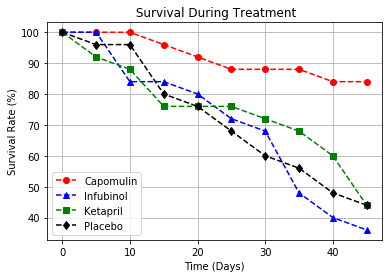

In [66]:
plt.errorbar(x=fourdrugs_df['Timepoint'],y=fourdrugs_df['Capomulin_percent'], yerr=None, linestyle="--", fmt='o', color= 'r', label='Capomulin')
plt.errorbar(x=fourdrugs_df['Timepoint'],y=fourdrugs_df['Infubinol_percent'], yerr=None, linestyle="--", fmt='^', color= 'b', label='Infubinol')
plt.errorbar(x=fourdrugs_df['Timepoint'],y=fourdrugs_df['Ketapril_percent'], yerr=None, linestyle="--",fmt='s', color= 'g', label='Ketapril' )
plt.errorbar(x=fourdrugs_df['Timepoint'],y=fourdrugs_df['Placebo_percent'], yerr=None, linestyle="--", fmt='d', color= 'k', label='Placebo')

plt.ylabel("Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title(' Survival During Treatment')
plt.grid()
plt.legend()
# Save the Figure
plt.savefig("../Accountingforpercentages.png")
# Show the Figure
plt.show()

In [88]:
tumor_pct_change =  100 * (Data_Munging.iloc[-1] - Data_Munging.iloc[0]) / Data_Munging.iloc[0]
pct_changes = (tumor_pct_change["Capomulin"],
              tumor_pct_change["Infubinol"],
              tumor_pct_change["Ketapril"],
              tumor_pct_change["Placebo"])
pct_changes

(-19.475302667894173,
 46.123471727851836,
 57.028794686606076,
 51.29796048315153)

In [68]:
# #for Ceftamin
# Ceftamin=(Data_Munging["Ceftamin"].iloc[-1]-Data_Munging["Ceftamin"].iloc[0])/Data_Munging["Ceftamin"].iloc[0]*100
# # Display the data to confirm
# Ceftamin
# # Display the data to confirmtumor_pct_change =  100 * (tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0]) / tumor_vols_pivot_mean.iloc[0]

42.516491855897414

In [86]:
# # for Infubinol
# Infubinol=(Data_Munging["Infubinol"].iloc[-1]-Data_Munging["Infubinol"].iloc[0])/Data_Munging["Infubinol"].iloc[0]*100
# # Display the data to confirm
# Infubinol
# # Display the data to confirm

46.12347172785184

In [81]:
# # for Ketapril
# Ketapril=(Data_Munging["Ketapril"].iloc[-1]-Data_Munging["Ketapril"].iloc[0])/Data_Munging["Ketapril"].iloc[0]*100
# # Display the data to confirm
# Ketapril
# # Display the data to confirm

57.028794686606076

In [83]:
# # for Naftisol     
# Naftisol=(Data_Munging["Naftisol"].iloc[-1]-Data_Munging["Naftisol"].iloc[0])/Data_Munging["Naftisol"].iloc[0]*100
# # Display the data to confirm
# Naftisol
# # Display the data to confirm

53.92334713476923

In [82]:
# # for Placebo      
# Placebo=(Data_Munging["Placebo"].iloc[-1]-Data_Munging["Placebo"].iloc[0])/Data_Munging["Placebo"].iloc[0]*100
# # Display the data to confirm
# Placebo
# # Display the data to confirm

51.29796048315153

In [73]:
# # for Propriva    
# Propriva =(Data_Munging["Propriva"].iloc[-1]-Data_Munging["Propriva"].iloc[0])/Data_Munging["Propriva"].iloc[0]*100
# # Display the data to confirm
# Propriva

47.24117486320634

In [74]:
# # for Ramicane    
# Ramicane =(Data_Munging["Ramicane"].iloc[-1]-Data_Munging["Ramicane"].iloc[0])/Data_Munging["Ramicane"].iloc[0]*100
# # Display the data to confirm
# Ramicane

-22.320900462766673

In [75]:
# # for Stelasyn     
# Stelasyn =(Data_Munging["Stelasyn"].iloc[-1]-Data_Munging["Stelasyn"].iloc[0])/Data_Munging["Stelasyn"].iloc[0]*100
# # Display the data to confirm
# Stelasyn

52.08513428789896

In [84]:
# #for Zoniferol
# Zoniferol=(Data_Munging["Zoniferol"].iloc[-1]-Data_Munging["Zoniferol"].iloc[0])/Data_Munging["Zoniferol"].iloc[0]*100
# # Display the data to confirm
# Zoniferol

46.57975086509525

In [87]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs



SyntaxError: invalid syntax (<ipython-input-87-09540f0c9284>, line 2)

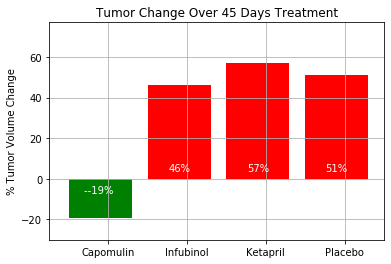

In [97]:
#using subplot function to get value to ax and fig. 
fig,ax = plt.subplots()

x_axis = np.arange(len(pct_changes))   # x_axis gets the value from the aranage funstion (using len on dataframe)
      

change_perc_fail = ax.bar(x_axis[1:],pct_changes[1:], color="red", align="edge")
change_perc_pass = ax.bar(x_axis[0],pct_changes[0], color="green", align="edge")
width = 1
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))

def autolabelFail(rects):
   for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., 3,
               '%d%%' % int(height),
               ha='center', va='bottom', color="white")
def autolabelPass(rects):
   for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., -8,
               '-%d%% ' % int(height),
               ha='center', va='bottom', color="white")
autolabelFail(change_perc_fail)
autolabelPass(change_perc_pass)
ax.set_xticks(x_axis + 0.5)

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(pct_changes))
plt.ylim(-30, max(pct_changes) + 20)
plt.grid(True)
# Save the Figure
plt.savefig("../summaryDrugs.png")
# Show the Figure
plt.show()